<a href="https://colab.research.google.com/github/wujulie/ML__homework/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import numpy as np
# import pandas as pd
# from sklearn.metrics import classification_report
# from sklearn.utils import shuffle
# from sklearn.model_selection import cross_val_score
# import keras 
# from keras.models import Sequential
# from keras.layers import Dense, Dropout,Activation ,Flatten
# from keras.utils import np_utils
# from keras.utils import to_categorical 
# from keras.layers import LSTM
# from keras.optimizers import RMSprop
# import pandas_datareader.data as web
# import datetime
# df = pd.read_csv("/content/drive/MyDrive/sb.csv")


In [2]:
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import numpy as np 
import pandas as pd 
from sklearn.model_selection import cross_val_score
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation ,Flatten
from keras.utils import np_utils
from keras.utils import to_categorical 
from keras.layers import LSTM
from keras.optimizers import RMSprop
import pandas_datareader.data as web
import datetime
start=datetime.datetime(2015,12,15)
end=datetime.datetime(2020,12,15)
number='2330'
df=web.DataReader(number+'.TW','yahoo',start,end)
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-10,515.0,510.0,511.0,512.0,42556926.0,509.500000
2020-12-11,517.0,505.0,517.0,516.0,45660960.0,513.480469
2020-12-14,513.0,508.0,512.0,508.0,30260485.0,505.519531
2020-12-15,510.0,504.0,507.0,504.0,39852366.0,501.539062
2020-12-16,515.0,507.0,509.0,512.0,52012348.0,509.500000


In [3]:
df=df[['Open','Low','High','Volume','Close']]
df.shape

(1220, 5)

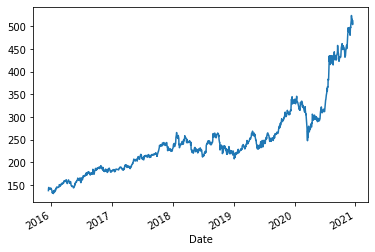

In [4]:
df.Close.plot()

In [5]:
n=1
df['y']=df['Close'].shift(-n)-df['Close']
df.tail()

,Open,Low,High,Volume,Close,y
Date,,,,,,
2020-12-10,511.0,510.0,515.0,42556926.0,512.0,4.0
2020-12-11,517.0,505.0,517.0,45660960.0,516.0,-8.0
2020-12-14,512.0,508.0,513.0,30260485.0,508.0,-4.0
2020-12-15,507.0,504.0,510.0,39852366.0,504.0,8.0
2020-12-16,509.0,507.0,515.0,52012348.0,512.0,NaN


In [6]:
df["MA5"]=df["Close"].rolling(window=5,min_periods=1).mean()
df['MA20'] = df["Close"].rolling(window=20,min_periods=1).mean()
df['MA60'] = df["Close"].rolling(window=60,min_periods=1).mean()

In [7]:



# 計算 9 日內最高成交價
df['9DAYMAX'] = df['High'].rolling('9D').max()
print(df)

# 計算 9 日內最低成交價
df['9DAYMIN'] = df['Low'].rolling('9D').min()
print(df)

# 計算每日 RSV 值
df['RSV'] = 0
df['RSV'] = 100 * (df['Close'] - df['9DAYMIN']) / (df['9DAYMAX'] - df['9DAYMIN'])
print(df)

# 計算 K 值
K = 0
def KValue(rsv):
    global K
    K = (2/3) * K + (1/3) * rsv
    return K
df['K'] = 0
df['K'] = df['RSV'].apply(KValue)

# 計算 D 值
D = 0
def DValue(k):
    global D
    D = (2/3) * D + (1/3) * k
    return D
df['D'] = 0
df['D'] = df['K'].apply(DValue)

print(df)

             Open    Low   High  ...        MA20        MA60  9DAYMAX
Date                             ...                                 
2015-12-15  139.5  138.0  140.5  ...  138.000000  138.000000    140.5
2015-12-16  142.0  141.0  144.0  ...  140.750000  140.750000    144.0
2015-12-17  144.5  143.0  145.0  ...  142.166667  142.166667    145.0
2015-12-18  143.0  142.0  145.0  ...  142.125000  142.125000    145.0
2015-12-21  141.5  140.5  142.5  ...  142.000000  142.000000    145.0
...           ...    ...    ...  ...         ...         ...      ...
2020-12-10  511.0  510.0  515.0  ...  494.975000  462.200000    525.0
2020-12-11  517.0  505.0  517.0  ...  497.675000  463.383333    525.0
2020-12-14  512.0  508.0  513.0  ...  498.875000  464.216667    525.0
2020-12-15  507.0  504.0  510.0  ...  499.800000  465.141667    525.0
2020-12-16  509.0  507.0  515.0  ...  500.550000  466.275000    525.0

[1220 rows x 10 columns]
             Open    Low   High  ...        MA60  9DAYMAX  9DAYM

In [8]:
df=df.drop("9DAYMAX", axis = 1)
df=df.drop("9DAYMIN", axis = 1)
df

,Open,Low,High,Volume,Close,y,MA5,MA20,MA60,RSV,K,D
Date,,,,,,,,,,,,
2015-12-15,139.5,138.0,140.5,23558000.0,138.0,5.5,138.000000,138.000000,138.000000,0.000000,0.000000,0.000000
2015-12-16,142.0,141.0,144.0,56401000.0,143.5,1.5,140.750000,140.750000,140.750000,91.666667,30.555556,10.185185
2015-12-17,144.5,143.0,145.0,34462000.0,145.0,-3.0,142.166667,142.166667,142.166667,100.000000,53.703704,24.691358
2015-12-18,143.0,142.0,145.0,36298000.0,142.0,-0.5,142.125000,142.125000,142.125000,57.142857,54.850088,34.744268
2015-12-21,141.5,140.5,142.5,26847000.0,141.5,0.5,142.000000,142.000000,142.000000,50.000000,53.233392,40.907309
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10,511.0,510.0,515.0,42556926.0,512.0,4.0,514.600000,494.975000,462.200000,58.730159,77.558163,77.256985
2020-12-11,517.0,505.0,517.0,45660960.0,516.0,-8.0,517.200000,497.675000,463.383333,70.000000,75.038775,76.517582
2020-12-14,512.0,508.0,513.0,30260485.0,508.0,-4.0,516.000000,498.875000,464.216667,15.000000,55.025850,69.353671


In [9]:
df.to_csv('2330_stock.csv')

In [10]:
from sklearn.preprocessing import  StandardScaler
ss=StandardScaler()
df_scaled=ss.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,index=df.index,columns=df.columns)
df_scaled['y']=df['y']
df_scaled.tail()  

,Open,Low,High,Volume,Close,y,MA5,MA20,MA60,RSV,K,D
Date,,,,,,,,,,,,
2020-12-10,3.341956,3.392213,3.347204,0.485557,3.365443,4.0,3.436206,3.322755,3.200891,0.077481,0.960301,1.136745
2020-12-11,3.418058,3.328072,3.372392,0.655118,3.416335,-8.0,3.469578,3.358594,3.217881,0.426438,0.847200,1.097050
2020-12-14,3.354640,3.366557,3.322016,-0.186149,3.314550,-4.0,3.454175,3.374522,3.229845,-1.276570,-0.051226,0.712454
2020-12-15,3.291221,3.315244,3.284234,0.337817,3.263657,8.0,3.402835,3.386800,3.243125,-1.741027,-0.874638,0.127825
2020-12-16,3.316589,3.353728,3.347204,1.002068,3.365443,NaN,3.382299,3.396755,3.259397,-0.561454,-0.853518,-0.253508


In [11]:
import tqdm
n=3
feature_names=list(df_scaled.drop('y',axis=1).columns)
X=[]
y=[]
indexes=[]
df_scaled_x=df_scaled[feature_names]
for i in tqdm.tqdm_notebook(range(0,len(df_scaled)-n)):#len(df_scaled)-n
  X.append(df_scaled_x.iloc[i:i+n].values)
  y.append(df_scaled['y'].iloc[i+n-1])
  indexes.append(df_scaled.index[i+n-1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [12]:
print(indexes)
print(type(indexes))
print(indexes[3])

[Timestamp('2015-12-17 00:00:00'), Timestamp('2015-12-18 00:00:00'), Timestamp('2015-12-21 00:00:00'), Timestamp('2015-12-22 00:00:00'), Timestamp('2015-12-23 00:00:00'), Timestamp('2015-12-24 00:00:00'), Timestamp('2015-12-25 00:00:00'), Timestamp('2015-12-28 00:00:00'), Timestamp('2015-12-29 00:00:00'), Timestamp('2015-12-30 00:00:00'), Timestamp('2015-12-31 00:00:00'), Timestamp('2016-01-04 00:00:00'), Timestamp('2016-01-05 00:00:00'), Timestamp('2016-01-06 00:00:00'), Timestamp('2016-01-07 00:00:00'), Timestamp('2016-01-08 00:00:00'), Timestamp('2016-01-11 00:00:00'), Timestamp('2016-01-12 00:00:00'), Timestamp('2016-01-13 00:00:00'), Timestamp('2016-01-14 00:00:00'), Timestamp('2016-01-15 00:00:00'), Timestamp('2016-01-18 00:00:00'), Timestamp('2016-01-19 00:00:00'), Timestamp('2016-01-20 00:00:00'), Timestamp('2016-01-21 00:00:00'), Timestamp('2016-01-22 00:00:00'), Timestamp('2016-01-25 00:00:00'), Timestamp('2016-01-26 00:00:00'), Timestamp('2016-01-27 00:00:00'), Timestamp('20

In [13]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)
print(X)

(1217, 3, 11)
(1217,)
[[[-1.37002192 -1.3799079  -1.36925269 ... -1.74102719 -2.52146146
   -3.0108162 ]
  [-1.33831278 -1.34142305 -1.32517366 ...  1.0973205  -1.14975298
   -2.46402187]
  [-1.30660364 -1.31576648 -1.31257965 ...  1.35535211 -0.11057989
   -1.68525419]]

 [[-1.33831278 -1.34142305 -1.32517366 ...  1.0973205  -1.14975298
   -2.46402187]
  [-1.30660364 -1.31576648 -1.31257965 ...  1.35535211 -0.11057989
   -1.68525419]
  [-1.32562912 -1.32859476 -1.31257965 ...  0.02833241 -0.05911608
   -1.14556109]]

 [[-1.30660364 -1.31576648 -1.31257965 ...  1.35535211 -0.11057989
   -1.68525419]
  [-1.32562912 -1.32859476 -1.31257965 ...  0.02833241 -0.05911608
   -1.14556109]
  [-1.3446546  -1.34783719 -1.34406467 ... -0.19283754 -0.13169324
   -0.8146966 ]]

 ...

 [[ 3.46879261  3.52049616  3.46054987 ...  0.98229436  1.38291713
    1.12866082]
  [ 3.34195605  3.39221333  3.34720378 ...  0.07748128  0.96030113
    1.13674523]
  [ 3.41805799  3.32807192  3.3723918  ...  0.4264383

In [14]:
y[y <= 0] = 0	
y[y > 0 ]=1	

In [15]:
X_train=X[:1101]
y_train=y[:1101]
model = Sequential()

model.add(LSTM(
    units=30,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(Dense(
    units=1))
model.add(Activation('relu'))

model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [16]:
history=model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    validation_split=0.2
)


Epoch 1/100
14/14 [==============================] - 3s 62ms/step - loss: 0.4316 - accuracy: 0.4943 - val_loss: 0.4513 - val_accuracy: 0.5068
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3448 - accuracy: 0.5002 - val_loss: 0.4614 - val_accuracy: 0.5068
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 0.3052 - accuracy: 0.5293 - val_loss: 0.4489 - val_accuracy: 0.5068
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2995 - accuracy: 0.5154 - val_loss: 0.4266 - val_accuracy: 0.5068
Epoch 5/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2885 - accuracy: 0.5160 - val_loss: 0.4167 - val_accuracy: 0.5068
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2828 - accuracy: 0.5230 - val_loss: 0.3964 - val_accuracy: 0.5068
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2814 - accuracy: 0.5034 - val_loss: 0.3827 - val_accuracy: 0.5083
Epoch 8/100


In [17]:
X_test=X[1101:-1]
y_test=y[1101:-1]
y_pred=model.predict(X_test)


In [18]:
print(model.evaluate(X_train, y_train))
model.evaluate(X_test, y_test)

35/35 [==============================] - 0s 1ms/step - loss: 0.2527 - accuracy: 0.5434
[0.25272560119628906, 0.5434454083442688]
4/4 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.4348


[0.4906693398952484, 0.43478259444236755]